1. format data for deseq
2. score compass genes

In [34]:
import pandas as pd
import scanpy as sc
import sys
import numpy as np
import scipy
import joblib
import matplotlib.pyplot as plt
from utils import *

In [31]:
out_file_path = './'
data_dir = out_file_path + 'data/white_lab/'
counts_dir = data_dir + 'raw_gene_counts.tsv'
gene_signature_dir = out_file_path + 'gene_signatures/'
out_dir = out_file_path + 'white_results/'

# format data for deseq

In [222]:
exclude = '12DarkATG7WTfemale2028-50-Liver'

In [227]:
all_counts = pd.read_csv(counts_dir, sep = '\t')
all_counts

,12DarkATG7KOfemale1911-21-GNP,12DarkATG7KOfemale1911-22-iWAT,12DarkATG7KOfemale1911-23-BAT,12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1911-25-Cerebellum,12DarkATG7KOfemale1914-26-GNP,12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOfemale1914-28-BAT,12DarkATG7KOfemale1914-29-Cerebellum,12DarkATG7KOfemale1914-30-iWAT,...,6LightATG7WT1977-143-BAT,6LightATG7WT1977-144-Liver,6LightATG7WT2040-125-Cerebellum,6LightATG7WT2040-126-BAT,6LightATG7WT2040-127-GNP,6LightATG7WT2040-128-Liver,6LightATG7WT2041-77-Liver,6LightATG7WT2041-78-BAT,6LightATG7WT2041-79-Cerebellum,6LightATG7WT2041-80-GNP
0610005C13Rik,15,12,12,2165,21,22,2125,13,19,23,...,5,2534,21,22,12,4015,3223,21,18,15
0610006L08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,306,419,430,353,198,373,388,425,201,360,...,373,318,272,445,581,460,402,199,264,583
0610009E02Rik,3,20,11,2,14,4,5,4,17,18,...,11,9,11,12,2,12,2,9,18,3
0610009L18Rik,246,103,31,14,24,309,13,25,11,75,...,14,2,46,46,262,26,18,45,50,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyg11a,10,21,10,40,2,8,73,8,6,40,...,31,88,0,23,13,72,22,3,1,13
Zyg11b,1115,629,559,681,2206,1669,604,525,2564,415,...,990,1072,3868,762,1508,1430,326,337,2086,1316
Zyx,311,774,175,727,995,449,713,238,916,531,...,241,597,946,358,270,1008,817,765,1364,305
Zzef1,281,765,639,575,1435,375,625,616,1469,769,...,734,810,1493,836,361,1036,524,952,1521,375


**filter genes to only take genes with total counts >= 100**

(0.0, 2000.0)

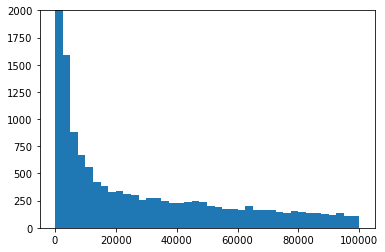

In [63]:
plt.hist(all_counts.sum(axis = 1)[all_counts.sum(axis = 1) < 100000], bins = 40)
plt.ylim(0,2000)

In [228]:
min_counts = 100

In [229]:
counts = all_counts[all_counts.sum(axis = 1) >= min_counts]
counts = counts.loc[:,~counts.columns.str.contains(exclude)]
counts

,12DarkATG7KOfemale1911-21-GNP,12DarkATG7KOfemale1911-22-iWAT,12DarkATG7KOfemale1911-23-BAT,12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1911-25-Cerebellum,12DarkATG7KOfemale1914-26-GNP,12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOfemale1914-28-BAT,12DarkATG7KOfemale1914-29-Cerebellum,12DarkATG7KOfemale1914-30-iWAT,...,6LightATG7WT1977-143-BAT,6LightATG7WT1977-144-Liver,6LightATG7WT2040-125-Cerebellum,6LightATG7WT2040-126-BAT,6LightATG7WT2040-127-GNP,6LightATG7WT2040-128-Liver,6LightATG7WT2041-77-Liver,6LightATG7WT2041-78-BAT,6LightATG7WT2041-79-Cerebellum,6LightATG7WT2041-80-GNP
0610005C13Rik,15,12,12,2165,21,22,2125,13,19,23,...,5,2534,21,22,12,4015,3223,21,18,15
0610009B22Rik,306,419,430,353,198,373,388,425,201,360,...,373,318,272,445,581,460,402,199,264,583
0610009E02Rik,3,20,11,2,14,4,5,4,17,18,...,11,9,11,12,2,12,2,9,18,3
0610009L18Rik,246,103,31,14,24,309,13,25,11,75,...,14,2,46,46,262,26,18,45,50,246
0610010F05Rik,277,361,337,265,552,370,274,325,449,302,...,528,350,875,394,417,430,217,243,743,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyg11a,10,21,10,40,2,8,73,8,6,40,...,31,88,0,23,13,72,22,3,1,13
Zyg11b,1115,629,559,681,2206,1669,604,525,2564,415,...,990,1072,3868,762,1508,1430,326,337,2086,1316
Zyx,311,774,175,727,995,449,713,238,916,531,...,241,597,946,358,270,1008,817,765,1364,305
Zzef1,281,765,639,575,1435,375,625,616,1469,769,...,734,810,1493,836,361,1036,524,952,1521,375


(0.0, 2000.0)

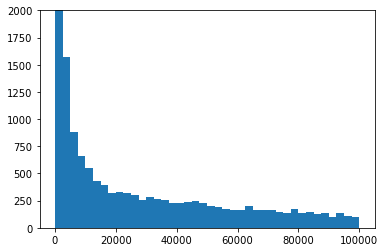

In [230]:
plt.hist(counts.sum(axis = 1)[counts.sum(axis = 1) < 100000], bins = 40)
plt.ylim(0,2000)

In [231]:
#counts.to_csv(data_dir + 'counts_filtered.csv')

**create metadata**


In [232]:
all_res = {}
for i in counts.columns:
    res = {}
    spl = i.split('-')
    res['organ'] = spl[2]
    res['samp'] = spl[1]
    res['time'] = 'Dark'
    if 'Light' in spl[0]:
        res['time'] = 'Light'
    res['genotype'] = 'KO'
    if 'WT' in spl[0]:
        res['genotype'] = 'WT'
        if 'KO' in spl[0]:
            print(i)
    res['gender'] = 'male'
    if 'female' in spl[0]:
        res['gender'] = 'female'
    all_res[i] = res

In [233]:
metadata = pd.DataFrame(all_res).transpose()
metadata

,organ,samp,time,genotype,gender
12DarkATG7KOfemale1911-21-GNP,GNP,21,Dark,KO,female
12DarkATG7KOfemale1911-22-iWAT,iWAT,22,Dark,KO,female
12DarkATG7KOfemale1911-23-BAT,BAT,23,Dark,KO,female
12DarkATG7KOfemale1911-24-Liver,Liver,24,Dark,KO,female
12DarkATG7KOfemale1911-25-Cerebellum,Cerebellum,25,Dark,KO,female
...,...,...,...,...,...
6LightATG7WT2040-128-Liver,Liver,128,Light,WT,male
6LightATG7WT2041-77-Liver,Liver,77,Light,WT,male
6LightATG7WT2041-78-BAT,BAT,78,Light,WT,male
6LightATG7WT2041-79-Cerebellum,Cerebellum,79,Light,WT,male


In [234]:
#pd.Series(counts.columns).to_csv(data_dir + 'counts_colnames.csv', index = False)
#pd.Series(metadata[metadata['organ'] == 'Liver'].index).to_csv(data_dir + 'metadata_colnames_liver.csv', index = False)

In [235]:
#metadata.to_csv(data_dir + 'metadata_all.csv')

In [236]:
#metadata[metadata['organ'] == 'Liver'].to_csv(data_dir + 'metadata_liver.csv')

# score compass subsystem & reaction on DE genes
de genes from DESEQ. liver. WT vs KO

**read in data**

In [237]:
out_filename = gene_signature_dir + 'metabolism_rxn_subsystem.pickle'
subsystem_to_genes = joblib.load(out_filename)
metabolism_sig = {key: [item[0] for item in subsystem_to_genes[key]] for key in subsystem_to_genes}

In [238]:
out_filename = gene_signature_dir + 'metabolism_rxn_reaction.pickle'
reaction_sig_genes = joblib.load(out_filename)
reaction_sig = {k: v[0] for k,v in reaction_sig_genes.items()}

In [239]:
print(len(metabolism_sig.keys()))

81


In [240]:
print(len(reaction_sig.keys()))

1292


In [241]:
counts_filtered = pd.read_csv(data_dir + 'counts_filtered.csv', sep = ',', index_col = 0)
counts_filtered.index = counts_filtered.index.str.upper()
counts_filtered

,12DarkATG7KOfemale1911-21-GNP,12DarkATG7KOfemale1911-22-iWAT,12DarkATG7KOfemale1911-23-BAT,12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1911-25-Cerebellum,12DarkATG7KOfemale1914-26-GNP,12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOfemale1914-28-BAT,12DarkATG7KOfemale1914-29-Cerebellum,12DarkATG7KOfemale1914-30-iWAT,...,6LightATG7WT1977-143-BAT,6LightATG7WT1977-144-Liver,6LightATG7WT2040-125-Cerebellum,6LightATG7WT2040-126-BAT,6LightATG7WT2040-127-GNP,6LightATG7WT2040-128-Liver,6LightATG7WT2041-77-Liver,6LightATG7WT2041-78-BAT,6LightATG7WT2041-79-Cerebellum,6LightATG7WT2041-80-GNP
0610005C13RIK,15,12,12,2165,21,22,2125,13,19,23,...,5,2534,21,22,12,4015,3223,21,18,15
0610009B22RIK,306,419,430,353,198,373,388,425,201,360,...,373,318,272,445,581,460,402,199,264,583
0610009E02RIK,3,20,11,2,14,4,5,4,17,18,...,11,9,11,12,2,12,2,9,18,3
0610009L18RIK,246,103,31,14,24,309,13,25,11,75,...,14,2,46,46,262,26,18,45,50,246
0610010F05RIK,277,361,337,265,552,370,274,325,449,302,...,528,350,875,394,417,430,217,243,743,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,10,21,10,40,2,8,73,8,6,40,...,31,88,0,23,13,72,22,3,1,13
ZYG11B,1115,629,559,681,2206,1669,604,525,2564,415,...,990,1072,3868,762,1508,1430,326,337,2086,1316
ZYX,311,774,175,727,995,449,713,238,916,531,...,241,597,946,358,270,1008,817,765,1364,305
ZZEF1,281,765,639,575,1435,375,625,616,1469,769,...,734,810,1493,836,361,1036,524,952,1521,375


In [242]:
n_genes_total = len(counts.index)
n_genes_total

26108

In [243]:
de_genes = pd.read_csv(out_dir + 'deseq_genes_liver_WT_vs_KO.csv', index_col = 0)
de_genes.index = de_genes.index.str.upper()
de_genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0610005C13RIK,2683.089234,0.049625,0.107086,0.463409,0.643071,0.863977
0610009B22RIK,364.440461,-0.144308,0.083923,-1.719524,0.085519,0.392600
0610009E02RIK,6.501321,-0.145545,0.264157,-0.550977,0.581649,0.836455
0610009L18RIK,9.687668,0.285742,0.277872,1.028324,0.303798,0.659291
0610010F05RIK,238.913073,0.171803,0.132389,1.297719,0.194384,0.556740
...,...,...,...,...,...,...
ZYG11A,53.770772,0.098781,0.249703,0.395595,0.692404,0.888533
ZYG11B,563.104948,0.297846,0.226982,1.312203,0.189452,0.550672
ZYX,739.610305,0.048483,0.110967,0.436912,0.662175,0.872634
ZZEF1,643.718977,0.090465,0.091321,0.990624,0.321869,0.674574


In [244]:
de_genes[de_genes['padj'] < 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700048O20RIK,37.541128,1.318160,0.290026,4.544966,0.000005,0.000567
1810053B23RIK,21.884580,-1.272437,0.397488,-3.201201,0.001369,0.040539
2010003K11RIK,166.614126,-0.809050,0.238511,-3.392084,0.000694,0.025235
2200002D01RIK,282.231615,-0.958863,0.260921,-3.674922,0.000238,0.011432
2210412B16RIK,4.682628,1.232510,0.393768,3.130040,0.001748,0.047713
...,...,...,...,...,...,...
ZFP-PS,8.630729,1.502903,0.378276,3.973035,0.000071,0.004458
ZFP395,780.197106,0.734406,0.153431,4.786549,0.000002,0.000211
ZFP84,129.318660,0.237778,0.075193,3.162222,0.001566,0.044670
ZFP993,9.741922,-1.116194,0.322611,-3.459873,0.000540,0.021351


In [245]:
logfc_thresh = 0
p_thresh = 0.05

# subsystem scoring

**filter subsystem genes**

In [246]:
all_genes = list(counts_filtered.index)
overlapping_terms, n_removed_terms = get_overlapping_met_genes(metabolism_sig, all_genes, verb = True)

Fatty acid oxidation	original: 32 | overlapping: 30 | removed: 2
Nucleotide interconversion	original: 102 | overlapping: 98 | removed: 4
Keratan sulfate degradation	original: 11 | overlapping: 11 | removed: 0
Sphingolipid metabolism	original: 29 | overlapping: 29 | removed: 0
Tyrosine metabolism	original: 34 | overlapping: 32 | removed: 2
Keratan sulfate synthesis	original: 15 | overlapping: 14 | removed: 1
Steroid metabolism	original: 25 | overlapping: 21 | removed: 4
Chondroitin synthesis	original: 30 | overlapping: 30 | removed: 0
Tryptophan metabolism	original: 36 | overlapping: 35 | removed: 1
Glycerophospholipid metabolism	original: 61 | overlapping: 57 | removed: 4
Inositol phosphate metabolism	original: 60 | overlapping: 59 | removed: 1
Folate metabolism	original: 11 | overlapping: 11 | removed: 0
Valine, leucine, and isoleucine metabolism	original: 31 | overlapping: 30 | removed: 1
Chondroitin sulfate degradation	original: 10 | overlapping: 10 | removed: 0
Cholesterol metaboli

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 73.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

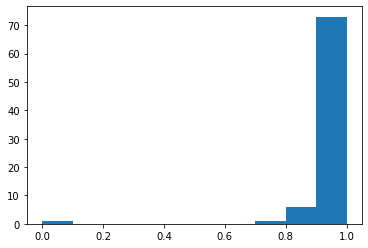

In [247]:
prop_removed = {}
for k,v in n_removed_terms.items():
    prop_removed[k] = (len(metabolism_sig[k]) - v)/len(metabolism_sig[k])
plt.hist(prop_removed.values())

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. ]),
 <BarContainer object of 40 artists>)

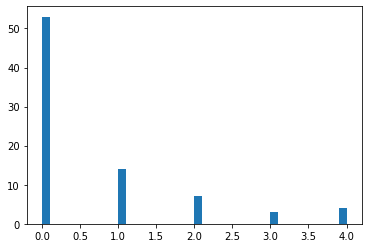

In [248]:
plt.hist(n_removed_terms.values(), bins = 40)

**filter to min proportion of signature retained**

In [249]:
min_prop = 0.6
min_length = 1
overlapping_terms_filter = {}

for k,v in overlapping_terms.items():
    if (len(v) >= min_length) & (prop_removed[k] > min_prop):
        overlapping_terms_filter[k] = v
    else:
        print(f'removed {k}')

removed Stilbene, coumarine and lignin synthesis


In [250]:
print(len(overlapping_terms_filter))
for k,v in overlapping_terms_filter.items():
    print(f'{k}: {len(v)}')

80
Fatty acid oxidation: 30
Nucleotide interconversion: 98
Keratan sulfate degradation: 11
Sphingolipid metabolism: 29
Tyrosine metabolism: 32
Keratan sulfate synthesis: 14
Steroid metabolism: 21
Chondroitin synthesis: 30
Tryptophan metabolism: 35
Glycerophospholipid metabolism: 57
Inositol phosphate metabolism: 59
Folate metabolism: 11
Valine, leucine, and isoleucine metabolism: 30
Chondroitin sulfate degradation: 10
Cholesterol metabolism: 21
Arginine and Proline Metabolism: 33
Bile acid synthesis: 9
Fatty acid synthesis: 8
Glycine, serine, alanine and threonine metabolism: 23
Pyrimidine catabolism: 22
Blood group synthesis: 5
Pyruvate metabolism: 31
Aminosugar metabolism: 25
Heparan sulfate degradation: 6
Urea cycle: 17
Purine catabolism: 13
Eicosanoid metabolism: 19
Methionine and cysteine metabolism: 18
Lysine metabolism: 24
Starch and sucrose metabolism: 14
Pentose phosphate pathway: 11
NAD metabolism: 14
Vitamin A metabolism: 11
beta-Alanine metabolism: 21
Triacylglycerol synthe

## perform hypergeometric

In [251]:
def get_hypergeometric_results_white_data(de_genes, metabolism, M = n_genes_total, p_thresh = p_thresh, logfc_thresh = logfc_thresh):
    conditions = ['WT', 'KO']
    res = {k: {} for k in conditions}
    for key in conditions:
        df = de_genes.copy()
        df = df[df['padj'] < p_thresh]
        if key == conditions[0]:
            df = df[df['log2FoldChange'] > logfc_thresh]
        else:
            df = df[df['log2FoldChange'] < (-1 * logfc_thresh)]
            
        df['genes'] = df.index.str.upper()
        df_genes = set(df['genes'])
        N = len(df) # length of DE genes
        for k,v in metabolism.items():
            n = len(v) # number of met genes
            x = len(df_genes.intersection(v))
            pct_overlap = x/(N+n)

            if pct_overlap > 0:
                p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                            n_genes_picked=N, n_overlap=x)
                res[key][k] = p_val
#             else:
#                 res[key][k] = 1
    return res

In [252]:
def format_hypergeom_res(res):
    res_df = pd.DataFrame.from_dict(res)
    res_df['term'] = res_df.index
    res_df['padj_WT'] = adjust_p_value_bh(res_df['WT'].values)
    res_df['padj_KO'] = adjust_p_value_bh(res_df['KO'].values)
    res_df['q_WT'] = adjust_p_value_qval(res_df['WT'].values,pi_0=None)
    res_df['q_KO'] = adjust_p_value_qval(res_df['KO'].values,pi_0=None)
    
    cols_WT = ['WT', 'term', 'padj_WT', 'q_WT']
    res_df_format = res_df[cols_WT].reset_index(drop = True).copy()
    res_df_format.columns = ['p', 'term', 'padj', 'q']
    res_df_format = res_df_format[['term', 'p', 'padj', 'q']]
    res_WT = res_df_format.copy()
    
    cols_KO = ['KO', 'term', 'padj_KO', 'q_KO']
    res_df_format = res_df[cols_KO].reset_index(drop = True).copy()
    res_df_format.columns = ['p', 'term', 'padj', 'q']
    res_df_format = res_df_format[['term', 'p', 'padj', 'q']]
    res_KO = res_df_format.copy()
    
    return res_WT, res_KO

In [253]:
r = get_hypergeometric_results_white_data(de_genes, overlapping_terms_filter)
pd.DataFrame.from_dict(r)

,WT,KO
Fatty acid oxidation,0.026781,NaN
Nucleotide interconversion,0.051246,0.144185
Steroid metabolism,0.164227,0.354307
Inositol phosphate metabolism,0.396128,0.707672
Cholesterol metabolism,0.164227,NaN
Pyrimidine catabolism,0.171340,NaN
Urea cycle,0.135165,NaN
Starch and sucrose metabolism,0.112710,0.252919
Triacylglycerol synthesis,0.164227,NaN
Glyoxylate and dicarboxylate metabolism,0.199192,0.418203


(0.0, 1.0)

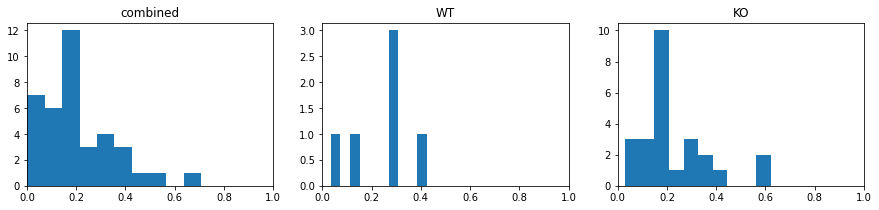

In [254]:
# combined
fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].hist([i for s in [r[k].values() for k in r.keys()] for i in s])
axs[0].set_title('combined')
axs[1].hist(res_WT['p'])
axs[1].set_title('WT')
axs[2].hist(res_KO['p'])
axs[2].set_title('KO')
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)

In [255]:
res_WT, res_KO = format_hypergeom_res(get_hypergeometric_results_white_data(de_genes, overlapping_terms_filter))

In [256]:
# res_WT.to_csv(out_dir + 'res_WT.csv')
# res_KO.to_csv(out_dir + 'res_KO.csv')

In [257]:
res_WT[res_WT['p'].notna()].sort_values('p')

,term,p,padj,q
0,Fatty acid oxidation,0.026781,NaN,0.0
10,Pyrimidine synthesis,0.049951,NaN,0.0
1,Nucleotide interconversion,0.051246,NaN,0.0
11,Galactose metabolism,0.089674,NaN,0.0
7,Starch and sucrose metabolism,0.112710,NaN,0.0
6,Urea cycle,0.135165,NaN,0.0
2,Steroid metabolism,0.164227,NaN,0.0
4,Cholesterol metabolism,0.164227,NaN,0.0
8,Triacylglycerol synthesis,0.164227,NaN,0.0
5,Pyrimidine catabolism,0.171340,NaN,0.0


In [258]:
res_KO[res_KO['p'].notna()].sort_values('p')

,term,p,padj,q
26,Glutathione metabolism,0.002133,NaN,0.0
14,Tyrosine metabolism,0.027728,NaN,0.0
15,Tryptophan metabolism,0.034979,NaN,0.0
30,Nucleotide salvage pathway,0.040790,NaN,0.0
20,Aminosugar metabolism,0.093182,NaN,0.0
29,N-glycan degradation,0.117454,NaN,0.0
28,Hyaluronan metabolism,0.135644,NaN,0.0
1,Nucleotide interconversion,0.144185,NaN,0.0
17,Chondroitin sulfate degradation,0.188001,NaN,0.0
16,Folate metabolism,0.204740,NaN,0.0


# look at how much overlap between terms and DE genes

In [259]:
de_each = {}
de_each['wt_up'] = de_genes[(de_genes['padj'] < p_thresh) & (de_genes['log2FoldChange'] > logfc_thresh)]
de_each['ko_up'] = de_genes[(de_genes['padj'] < p_thresh) & (de_genes['log2FoldChange'] < logfc_thresh)]
de_each['wt_up'] = de_each['wt_up'].index.str.upper()
de_each['ko_up'] = de_each['ko_up'].index.str.upper()

In [260]:
explore = {}
for k,v in overlapping_terms_filter.items():
    explore[k] = {'len terms': len(v), 'wt_overlap': len(set(v) & set(de_each['wt_up'])), 'ko_overlap': len(set(v) & set(de_each['ko_up']))}
explore = pd.DataFrame(explore).transpose()

In [261]:
explore.head()

,len terms,wt_overlap,ko_overlap
Fatty acid oxidation,30,2,0
Nucleotide interconversion,98,3,4
Keratan sulfate degradation,11,0,1
Sphingolipid metabolism,29,0,0
Tyrosine metabolism,32,0,3


In [262]:
counts_filtered.loc[overlapping_terms_filter['Tyrosine metabolism']]

,12DarkATG7KOfemale1911-21-GNP,12DarkATG7KOfemale1911-22-iWAT,12DarkATG7KOfemale1911-23-BAT,12DarkATG7KOfemale1911-24-Liver,12DarkATG7KOfemale1911-25-Cerebellum,12DarkATG7KOfemale1914-26-GNP,12DarkATG7KOfemale1914-27-Liver,12DarkATG7KOfemale1914-28-BAT,12DarkATG7KOfemale1914-29-Cerebellum,12DarkATG7KOfemale1914-30-iWAT,...,6LightATG7WT1977-143-BAT,6LightATG7WT1977-144-Liver,6LightATG7WT2040-125-Cerebellum,6LightATG7WT2040-126-BAT,6LightATG7WT2040-127-GNP,6LightATG7WT2040-128-Liver,6LightATG7WT2041-77-Liver,6LightATG7WT2041-78-BAT,6LightATG7WT2041-79-Cerebellum,6LightATG7WT2041-80-GNP
ALDH3B1,20,162,19,97,63,16,170,30,63,118,...,36,93,81,39,32,95,44,30,97,39
ALDH3A1,0,10,0,0,18,1,5,0,5,9,...,0,0,10,0,6,0,0,0,5,3
ALDH3B3,0,23,2,133,2,3,181,6,1,36,...,4,0,3,7,0,161,224,14,1,1
ALDH1A3,20,532,16,18,36,29,17,4,30,156,...,19,9,39,8,33,22,0,33,39,35
MAOA,116,443,158,284,691,157,595,128,569,350,...,270,170,1013,192,267,390,201,160,848,229
MAOB,370,1035,1326,4531,369,437,4191,1328,416,830,...,1877,2984,731,1509,642,8841,4069,516,344,536
TPO,0,0,0,0,16,0,0,0,6,0,...,0,0,14,0,0,0,0,0,8,0
SULT1A1,284,3756,322,7602,147,293,7837,575,126,5414,...,431,1943,188,625,322,10290,7318,1152,114,381
COMT,455,4513,2426,6595,872,505,6882,2990,871,3936,...,4566,13901,1119,3334,706,10949,8218,1933,1203,670
ADH5,842,1680,1408,5977,846,960,5768,1475,852,1531,...,1693,6934,1004,1617,1225,9373,6379,943,1064,1072


In [263]:
de_genes.loc[overlapping_terms_filter['Tyrosine metabolism']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ALDH3B1,111.662427,-1.081302,0.195616,-5.527672,3.245085e-08,0.000007
ALDH3A1,0.972790,-1.035369,0.970653,-1.066673,2.861196e-01,NaN
ALDH3B3,70.384802,-0.186572,0.854125,-0.218437,8.270890e-01,0.943240
ALDH1A3,13.378260,-0.022998,0.288794,-0.079636,9.365268e-01,0.981659
MAOA,246.240892,-0.153843,0.227888,-0.675082,4.996234e-01,0.793537
MAOB,3334.294610,0.224952,0.187268,1.201229,2.296624e-01,0.593701
TPO,0.567603,-1.163774,1.146370,-1.015182,3.100191e-01,NaN
SULT1A1,6418.109764,-0.011773,0.213277,-0.055199,9.559803e-01,0.987067
COMT,10081.913592,-0.153653,0.122327,-1.256083,2.090857e-01,0.573816
ADH5,6570.600655,0.090941,0.125656,0.723728,4.692328e-01,0.777557


# score kegg

In [264]:
mouse_filename = gene_signature_dir + 'metabolism_terms_mouse_2.pickle'
mouse_terms = joblib.load(mouse_filename)
print(len(mouse_terms))

129


In [265]:
all_genes = list(counts_filtered.index)
overlapping_terms_kegg, n_removed_terms_kegg = get_overlapping_met_genes(mouse_terms, all_genes, verb = False)

(array([ 1.,  1.,  0.,  0.,  6.,  6.,  9., 23., 35., 48.]),
 array([0.65151515, 0.68636364, 0.72121212, 0.75606061, 0.79090909,
        0.82575758, 0.86060606, 0.89545455, 0.93030303, 0.96515152,
        1.        ]),
 <BarContainer object of 10 artists>)

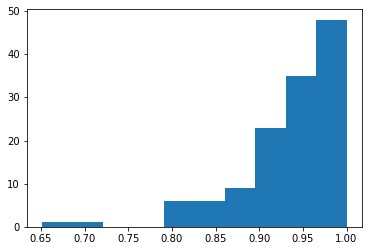

In [266]:
prop_removed_kegg = {}
for k,v in n_removed_terms_kegg.items():
    prop_removed_kegg[k] = (len(mouse_terms[k]) - v)/len(mouse_terms[k])
plt.hist(prop_removed_kegg.values())

(array([55., 41., 14.,  4.,  7.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ,  29.7,  32.4,  35.1,  37.8,  40.5,  43.2,  45.9,
         48.6,  51.3,  54. ,  56.7,  59.4,  62.1,  64.8,  67.5,  70.2,
         72.9,  75.6,  78.3,  81. ,  83.7,  86.4,  89.1,  91.8,  94.5,
         97.2,  99.9, 102.6, 105.3, 108. ]),
 <BarContainer object of 40 artists>)

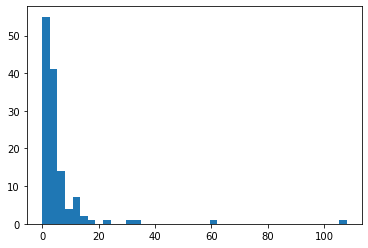

In [267]:
plt.hist(n_removed_terms_kegg.values(), bins = 40)

**filter to min proportion of signature retained**

In [268]:
min_prop = 0.7
min_length = 1
overlapping_terms_filter_kegg = {}
for k,v in overlapping_terms_kegg.items():
    if (len(v) >= min_length) & (prop_removed_kegg[k] > min_prop):
        overlapping_terms_filter_kegg[k] = v
    else:
        print(f'removed {k}')

removed KEGG_MM_AMINOACYL-TRNA_BIOSYNTHESIS


In [269]:
print(len(overlapping_terms_filter_kegg))
for k,v in overlapping_terms_filter_kegg.items():
    print(f'{k}: {len(v)}')

128
KEGG_MM_2-OXOCARBOXYLIC_ACID_METABOLISM: 18
KEGG_MM_AGE-RAGE_SIGNALING_PATHWAY_IN_DIABETIC_COMPLICATIONS: 100
KEGG_MM_AMPK_SIGNALING_PATHWAY: 123
KEGG_MM_ADIPOCYTOKINE_SIGNALING_PATHWAY: 68
KEGG_MM_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM: 38
KEGG_MM_ALDOSTERONE_SYNTHESIS_AND_SECRETION: 95
KEGG_MM_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM: 49
KEGG_MM_APELIN_SIGNALING_PATHWAY: 135
KEGG_MM_ARACHIDONIC_ACID_METABOLISM: 74
KEGG_MM_ARGININE_AND_PROLINE_METABOLISM: 51
KEGG_MM_ARGININE_BIOSYNTHESIS: 20
KEGG_MM_ASCORBATE_AND_ALDARATE_METABOLISM: 28
KEGG_MM_BIOSYNTHESIS_OF_AMINO_ACIDS: 71
KEGG_MM_BIOSYNTHESIS_OF_COFACTORS: 144
KEGG_MM_BIOSYNTHESIS_OF_NUCLEOTIDE_SUGARS: 37
KEGG_MM_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS: 34
KEGG_MM_BIOTIN_METABOLISM: 3
KEGG_MM_BUTANOATE_METABOLISM: 25
KEGG_MM_C-TYPE_LECTIN_RECEPTOR_SIGNALING_PATHWAY: 109
KEGG_MM_CAFFEINE_METABOLISM: 5
KEGG_MM_CARBON_METABOLISM: 111
KEGG_MM_CENTRAL_CARBON_METABOLISM_IN_CANCER: 65
KEGG_MM_CHOLESTEROL_METABOLISM: 49
KEGG_MM

In [270]:
res_WT_kegg, res_KO_kegg = format_hypergeom_res(get_hypergeometric_results_white_data(de_genes, overlapping_terms_filter_kegg))

In [271]:
# res_WT_kegg.to_csv(out_dir + 'res_WT_kegg.csv')
# res_KO_kegg.to_csv(out_dir + 'res_KO_kegg.csv')

In [278]:
res_WT_kegg[res_WT_kegg['p'].notna()].sort_values('p')

,term,p,padj,q
36,KEGG_MM_METABOLIC_PATHWAYS,0.000005,NaN,0.0
60,KEGG_MM_RETINOL_METABOLISM,0.000008,NaN,0.0
65,KEGG_MM_STEROID_HORMONE_BIOSYNTHESIS,0.000040,NaN,0.0
4,KEGG_MM_ARACHIDONIC_ACID_METABOLISM,0.000425,NaN,0.0
34,KEGG_MM_LINOLEIC_ACID_METABOLISM,0.000484,NaN,0.0
...,...,...,...,...
77,KEGG_MM_MTOR_SIGNALING_PATHWAY,0.718446,NaN,0.0
41,KEGG_MM_NOD-LIKE_RECEPTOR_SIGNALING_PATHWAY,0.730282,NaN,0.0
29,KEGG_MM_HIPPO_SIGNALING_PATHWAY,0.730282,NaN,0.0
48,KEGG_MM_PATHWAYS_OF_NEURODEGENERATION_MULTIPLE...,0.745861,NaN,0.0


In [273]:
t = res_KO_kegg[res_KO_kegg['p'].notna()].sort_values('p')
t[t['p'] < 0.1]

,term,p,padj,q
22,KEGG_MM_GLUTATHIONE_METABOLISM,2.889326e-14,NaN,7.879981e-13
37,KEGG_MM_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROM...,4.640805e-13,NaN,6.328370e-12
41,KEGG_MM_NOD-LIKE_RECEPTOR_SIGNALING_PATHWAY,1.973042e-08,NaN,1.426107e-07
40,KEGG_MM_NF-KAPPA_B_SIGNALING_PATHWAY,2.091623e-08,NaN,1.426107e-07
102,KEGG_MM_TOLL-LIKE_RECEPTOR_SIGNALING_PATHWAY,1.742150e-07,NaN,9.502637e-07
9,KEGG_MM_C-TYPE_LECTIN_RECEPTOR_SIGNALING_PATHWAY,1.597042e-05,NaN,7.259284e-05
30,KEGG_MM_IL-17_SIGNALING_PATHWAY,4.381956e-05,NaN,1.707255e-04
36,KEGG_MM_METABOLIC_PATHWAYS,1.184910e-04,NaN,4.039467e-04
6,KEGG_MM_BIOSYNTHESIS_OF_COFACTORS,2.041743e-04,NaN,6.187100e-04
101,KEGG_MM_TNF_SIGNALING_PATHWAY,4.310701e-04,NaN,1.175646e-03


(array([44., 23., 16., 15., 14., 11., 12., 15.,  3.,  6.]),
 array([2.88932629e-14, 9.46836910e-02, 1.89367382e-01, 2.84051073e-01,
        3.78734764e-01, 4.73418455e-01, 5.68102146e-01, 6.62785837e-01,
        7.57469528e-01, 8.52153219e-01, 9.46836910e-01]),
 <BarContainer object of 10 artists>)

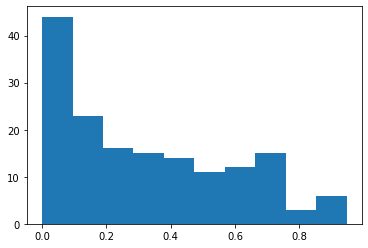

In [274]:
r_kegg = get_hypergeometric_results_white_data(de_genes, overlapping_terms_filter_kegg)
pd.DataFrame.from_dict(r_kegg)

# combined
plt.hist([i for s in [r_kegg[k].values() for k in r_kegg.keys()] for i in s], bins = 10)

(0.0, 1.0)

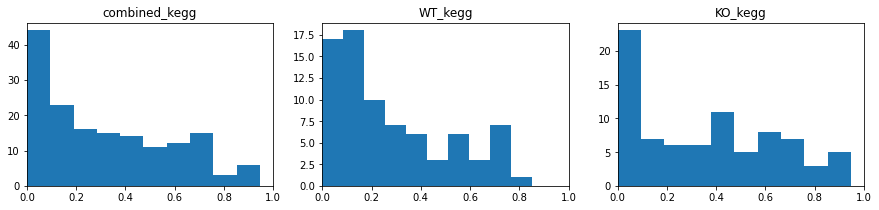

In [277]:
# combined
fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].hist([i for s in [r_kegg[k].values() for k in r_kegg.keys()] for i in s])
axs[0].set_title('combined_kegg')
axs[1].hist(res_WT_kegg['p'])
axs[1].set_title('WT_kegg')
axs[2].hist(res_KO_kegg['p'])
axs[2].set_title('KO_kegg')
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)